In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyximport
pyximport.install(setup_args={"include_dirs": np.get_include()})
from gauss_seidel import gauss_seidel_solve_heat_eq
%matplotlib inline

In [3]:
phi_0 = 1
x_0, x_max, Nx = 0, 1, 100
y_0, y_max, Ny = 0, 1, 100
t_0, t_max, Nt = 0, 10, 1000
lambda_x = 1e-1
lambda_ys = lambda_x * np.array([1, 2, 5, 10, 100])
dx = (x_max - x_0) / (Nx - 1)
dy = (y_max - y_0) / (Ny - 1)
dt = (t_max - t_0) / (Nt - 1)

In [4]:
xs = np.linspace(x_0, x_max, Nx)
ys = np.linspace(y_0, y_max, Ny)
ts = np.linspace(t_0, t_max, Nt)
XX, YY = np.meshgrid(xs, ys)

In [5]:
phi = np.zeros(shape=[Nt, Nx, Ny], dtype=np.float32)

In [6]:
phi[0, :, :] = phi_0 * np.cos(np.pi * XX) * np.sin(np.pi * YY)

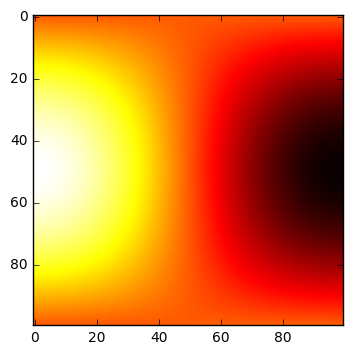

In [7]:
plt.imshow(phi[0, :, :], cmap='hot')
plt.show()

In [8]:
phi[0, :, :]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  3.17279324e-02,   3.17119583e-02,   3.16640548e-02, ...,
         -3.16640548e-02,  -3.17119583e-02,  -3.17279324e-02],
       [  6.34239167e-02,   6.33919910e-02,   6.32962286e-02, ...,
         -6.32962286e-02,  -6.33919910e-02,  -6.34239167e-02],
       ..., 
       [  6.34239167e-02,   6.33919910e-02,   6.32962286e-02, ...,
         -6.32962286e-02,  -6.33919910e-02,  -6.34239167e-02],
       [  3.17279324e-02,   3.17119583e-02,   3.16640548e-02, ...,
         -3.16640548e-02,  -3.17119583e-02,  -3.17279324e-02],
       [  1.22464685e-16,   1.22403024e-16,   1.22218119e-16, ...,
         -1.22218119e-16,  -1.22403024e-16,  -1.22464685e-16]], dtype=float32)

In [9]:
lambda_y = 1e-1

for k in range(Nt):
    for i in {0, Nx - 1}:
            x = xs[i]
            t = ts[k]
            phi[k, i, :] = phi_0 * np.cos(np.pi * x) * np.sin(np.pi * ys) * np.exp(-(lambda_x + lambda_y) * np.pi ** 2 * t)

In [10]:
gauss_seidel_solve_heat_eq(phi, lambda_x, lambda_y, dx, dy, dt, py_n_iters="adaptive", rmse_epsilon=1e-8)

Finished timestep 1 after 284 iterations, adaptive rmse 9.367155051462863e-09
Finished timestep 2 after 283 iterations, adaptive rmse 9.955631279632974e-09
Finished timestep 3 after 284 iterations, adaptive rmse 9.666137759113086e-09
Finished timestep 4 after 281 iterations, adaptive rmse 9.256919820599837e-09
Finished timestep 5 after 282 iterations, adaptive rmse 9.595074101986565e-09
Finished timestep 6 after 280 iterations, adaptive rmse 9.740580746497241e-09
Finished timestep 7 after 280 iterations, adaptive rmse 9.223977071563557e-09
Finished timestep 8 after 280 iterations, adaptive rmse 9.808927639207668e-09
Finished timestep 9 after 281 iterations, adaptive rmse 8.598414282331933e-09
Finished timestep 10 after 281 iterations, adaptive rmse 9.622870687180621e-09
Finished timestep 11 after 279 iterations, adaptive rmse 9.459445533215519e-09
Finished timestep 12 after 276 iterations, adaptive rmse 9.324509079856747e-09
Finished timestep 13 after 275 iterations, adaptive rmse 9.83

In [15]:
phi[300, 1:-1, 1:-1]

array([[  8.45232789e-05,   1.68961575e-04,   2.53229897e-04, ...,
          2.53245496e-04,   1.68972212e-04,   8.45286922e-05],
       [  8.44167953e-05,   1.68748884e-04,   2.52911355e-04, ...,
          2.52942176e-04,   1.68769882e-04,   8.44275128e-05],
       [  8.42239970e-05,   1.68363607e-04,   2.52334139e-04, ...,
          2.52379599e-04,   1.68394603e-04,   8.42398076e-05],
       ..., 
       [ -8.42126901e-05,  -1.68340877e-04,  -2.52299913e-04, ...,
         -2.52369675e-04,  -1.68387924e-04,  -8.42364389e-05],
       [ -8.44095775e-05,  -1.68734332e-04,  -2.52889440e-04, ...,
         -2.52935977e-04,  -1.68765720e-04,  -8.44254100e-05],
       [ -8.45197937e-05,  -1.68954575e-04,  -2.53219361e-04, ...,
         -2.53242586e-04,  -1.68970233e-04,  -8.45276954e-05]], dtype=float32)

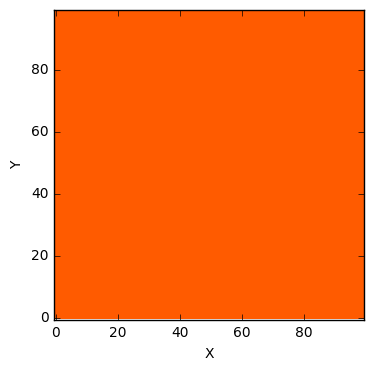

In [11]:
import matplotlib.animation as animation

fig = plt.figure()

curr_t = 0
im = plt.imshow(phi[curr_t, :, :].T, cmap='hot', animated=True, origin="lower")
plt.xlabel("X")
plt.ylabel("Y")


def updatefig(*args):
    global curr_t
    curr_t += 1
    im.set_array(phi[curr_t, :, :].T)
    return im,


ani = animation.FuncAnimation(fig, updatefig, 990, blit=True)
ani.save("video.mp4", fps=100, bitrate=768 * 1024)